<a href="https://colab.research.google.com/github/kafu77/Final-Capstone_Project/blob/main/Final_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Capstone Project**:

The capstone project was conducted to showcase the skills developed through a professional Machine Learning and Artificial Intelligence program. The project utilized the Cross-Industry Standard Process for Data Mining (CRISP-DM) methodology, which involves six phases: Business Understanding, Data Understanding, Data Preparation, Modeling, Evaluation, and Deployment. The project aimed to answer a question of interest using various tools and techniques encountered during the program.

###**CRISP-DM FARMWORK**

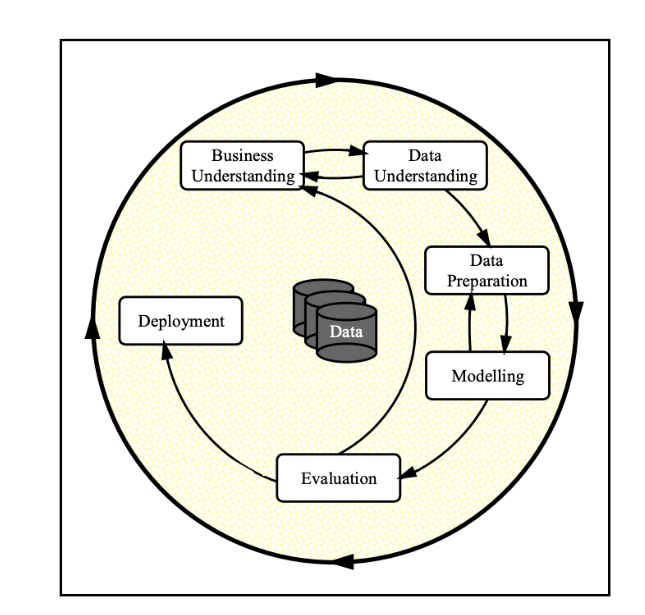


### **Business Understanding**: 
The challenge for home buyers is the exorbitant house prices which prevent many people from buying their dream home. Instead of describing the physical features of their ideal home, people often begin with concerns about price negotiations. Many people are unable to afford their dream home due to the increasing cost of houses, leading them to live in rental properties. This situation is often exploited by real estate agents who charge high rent prices.

Goal: The project aims to compare regression models and select the best one that can predict an affordable sale price for residential home buyers in Ames, Iowa. The models will be trained on original feature data and log-transformed target, and the results will be compared to recommend the best model.

In [ ]:
#Import data reading and visaulizing tools:
import numpy as np
import math
import time
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Import data Preprocessing tools from scikit learn:
from sklearn.preprocessing import StandardScaler,MinMaxScaler,PolynomialFeatures
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder,LabelEncoder
from sklearn.decomposition import PCA,FastICA
from sklearn.manifold import TSNE
from sklearn.compose import ColumnTransformer,make_column_selector,make_column_transformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.feature_selection import SequentialFeatureSelector,RFE
from sklearn.impute import SimpleImputer,KNNImputer

# Importing regressor models for regression problems from scikit learn:
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.inspection import permutation_importance
from sklearn.compose import TransformedTargetRegressor
from sklearn.preprocessing import PowerTransformer
from sklearn.inspection import permutation_importance

#Importing the Ensemble techniques
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor

#Importing a deep Neural Networks Models, layers, otimizers, and callbacks
import tensorflow as tf
from tensorflow.keras.models import Sequential,load_model
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.optimizers import SGD,RMSprop,Adam,Adagrad

#Importing Models performance evaluation tools from scikit learn:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score
from sklearn import set_config
set_config(display="diagram")
from sklearn.utils import shuffle

### **Data Understanding**:

### **About Dataset**:

Data Source: https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/overview

The data for the project was obtained from Kaggle, a popular platform for data science and machine learning. The dataset contains 81 explanatory variables that describe different aspects of residential homes in Ames, Iowa. The data understanding phase of the project involved assessing data availability, collection, granularity, and quality, as well as exploring the data.

### **Dataset Description**:
Here's a brief version of what you'll find in the data description file.

SalePrice - the property's sale price in dollars. This is the target variable

MSSubClass: The building class

MSZoning: The general zoning classification

LotFrontage: Linear feet of street connected to property

LotArea: Lot size in square feet

Street: Type of road access

Alley: Type of alley access

LotShape: General shape of property

LandContour: Flatness of the property

Utilities: Type of utilities available

LotConfig: Lot configuration

LandSlope: Slope of property

Neighborhood: Physical locations within Ames city limits

Condition1: Proximity to main road or railroad

Condition2: Proximity to main road or railroad (if a second is present)

BldgType: Type of dwelling

HouseStyle: Style of dwelling

OverallQual: Overall material and finish quality

OverallCond: Overall condition rating

YearBuilt: Original construction date

YearRemodAdd: Remodel date

RoofStyle: Type of roof

RoofMatl: Roof material

Exterior1st: Exterior covering on house

Exterior2nd: Exterior covering on house (if more than one material)

MasVnrType: Masonry veneer type

MasVnrArea: Masonry veneer area in square feet

ExterQual: Exterior material quality

ExterCond: Present condition of the material on the exterior

Foundation: Type of foundation

BsmtQual: Height of the basement

BsmtCond: General condition of the basement

BsmtExposure: Walkout or garden level basement walls

BsmtFinType1: Quality of basement finished area

BsmtFinSF1: Type 1 finished square feet area (if present)

BsmtFinSF2: Type 2 finished square feet

BsmtUnfSF: Unfinished square feet of basement area

TotalBsmtSF: Total square feet of basement area

Heating: Type of heating

HeatingQC: Heating quality and condition

CentralAir: Central air conditioning

Electrical: Electrical system

1stFlrSF: First Floor square feet

2ndFlrSF: Second floor square feet

LowQualFinSF: Low quality finished square feet (all floors)

GrLivArea: Above grade (ground) living area square feet

BsmtFullBath: Basement full bathrooms

BsmtHalfBath: Basement half bathrooms

FullBath: Full bathrooms above grade

HalfBath: Half baths above grade

Bedroom: Number of bedrooms above basement level

Kitchen: Number of kitchens

KitchenQual: Kitchen quality

TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)

Functional: Home functionality rating

Fireplaces: Number of fireplaces

FireplaceQu: Fireplace quality

GarageType: Garage location

GarageYrBlt: Year garage was built

GarageFinish: Interior finish of the garage

GarageCars: Size of garage in car capacity

GarageArea: Size of garage in square feet

GarageQual: Garage quality

GarageCond: Garage condition

PavedDrive: Paved driveway

WoodDeckSF: Wood deck area in square feet

OpenPorchSF: Open porch area in square feet

EnclosedPorch: Enclosed porch area in square feet

3SsnPorch: Three season porch area in square feet

ScreenPorch: Screen porch area in square feet

PoolArea: Pool area in square feet

PoolQC: Pool quality

Fence: Fence quality

MiscFeature: Miscellaneous feature not covered in other categories

MiscVal: $Value of miscellaneous feature

MoSold: Month Sold

YrSold: Year Sold

SaleType: Type of sale

SaleCondition: Condition of sale


Above grade (ground) living area square feet

FullBath: Full bathrooms above grade

TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)

In [ ]:
#read the data
#Run to connect to google drive
#from google.colab import drive
#drive.mount('/content/drive')
sale_price=pd.read_csv('/content/drive/MyDrive/Capstone Project/Final_capstone_project/train.csv')

In [ ]:
#reading top five of the data set
pd.options.display.max_columns=None
sale_price.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
#checking the shape of the data set
sale_price.shape

(1460, 81)

The dataset has 81 entries and 1460 datapoints. 

In [ ]:
sale_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
sale_price.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [ ]:
sale_price.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


 Only data between 25% and 75% quartile are used. Others outside from this range are not considered.

In [ ]:
#Checking missing values 
pd.options.display.max_columns=None
pd.options.display.max_rows=None
sale_price.isna().sum()/sale_price.shape[0]*100

Id                0.000000
MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      17.739726
LotArea           0.000000
Street            0.000000
Alley            93.767123
LotShape          0.000000
LandContour       0.000000
Utilities         0.000000
LotConfig         0.000000
LandSlope         0.000000
Neighborhood      0.000000
Condition1        0.000000
Condition2        0.000000
BldgType          0.000000
HouseStyle        0.000000
OverallQual       0.000000
OverallCond       0.000000
YearBuilt         0.000000
YearRemodAdd      0.000000
RoofStyle         0.000000
RoofMatl          0.000000
Exterior1st       0.000000
Exterior2nd       0.000000
MasVnrType        0.547945
MasVnrArea        0.547945
ExterQual         0.000000
ExterCond         0.000000
Foundation        0.000000
BsmtQual          2.534247
BsmtCond          2.534247
BsmtExposure      2.602740
BsmtFinType1      2.534247
BsmtFinSF1        0.000000
BsmtFinType2      2.602740
BsmtFinSF2        0.000000
B

The dataset used in the project has several features with a high amount of missing values, such as Alley, FireplaceQu, PoolQC, Fence, and Miscfeature. These features are not helpful and will be discarded.

### **Data Preparation**:
The data preparation step involves organizing the data into a structured form, resolving structure errors, removing and correcting incorrect, corrupt, and duplicated data. This is a time-consuming task and accounts for almost 80% of the project. Removing outliers is also a part of data preparation that helps to improve model performance.

In [ ]:
# Before filling and removing the missing values,get a copy of the orginal data set
data_copy=sale_price.copy()

In [ ]:
sale_price=data_copy

Numerica data cleaning:

this numerical data cleaning includes extracting of relevant content from a data by removing like outlier

In [ ]:
# Upper percentile and lower percentile based on sale price 
price_1 =sale_price['SalePrice'].quantile(0.80) 
price_2 =sale_price['SalePrice'].quantile(0.20)
print(f'upper percentile based on the sale price is:{price_1}')
print(f'lower percentile based on the sale price is:{price_2}')

upper percentile based on the sale price is:230000.0
lower percentile based on the sale price is:124000.0


In [ ]:
sale_price=sale_price[(sale_price['SalePrice']<price_1) &(sale_price['SalePrice']>price_2)]

categorical data cleaning:

The categorical cleaning includes cleaning miss values, duplicate, and incorrect values from all categorical features.

In [ ]:
missing_data=[]
for column in sale_price.columns:
  if sale_price[column].isna().sum()/sale_price.shape[0]*100>10:
   missing_data.append(column) 
print(missing_data)

['LotFrontage', 'Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature']


The project will only keep features that have below 10% missing values, as the features with more than 10% missing values, such as 'LotFrontage', 'Alley', 'FireplaceQu', 'PoolQC', 'Fence', and 'MiscFeature', are not helpful for the data exploratory analysis.

In [ ]:
#drop features that have many missing values
sale_price.drop(['Id','LotFrontage', 'Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'],axis=1,inplace=True)

In [ ]:
sale_price.shape

(1460, 74)

After the features that have more values missing are dropped, the data set reduced to 868 entries and 74 attributes.

In [ ]:
sale_price.isnull().sum()/sale_price.shape[0]*100

MSSubClass       0.000000
MSZoning         0.000000
LotArea          0.000000
Street           0.000000
LotShape         0.000000
LandContour      0.000000
Utilities        0.000000
LotConfig        0.000000
LandSlope        0.000000
Neighborhood     0.000000
Condition1       0.000000
Condition2       0.000000
BldgType         0.000000
HouseStyle       0.000000
OverallQual      0.000000
OverallCond      0.000000
YearBuilt        0.000000
YearRemodAdd     0.000000
RoofStyle        0.000000
RoofMatl         0.000000
Exterior1st      0.000000
Exterior2nd      0.000000
MasVnrType       0.547945
MasVnrArea       0.547945
ExterQual        0.000000
ExterCond        0.000000
Foundation       0.000000
BsmtQual         2.534247
BsmtCond         2.534247
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtFinSF1       0.000000
BsmtFinType2     2.602740
BsmtFinSF2       0.000000
BsmtUnfSF        0.000000
TotalBsmtSF      0.000000
Heating          0.000000
HeatingQC        0.000000
CentralAir  

Data Visualization 

<Figure size 1080x432 with 0 Axes>

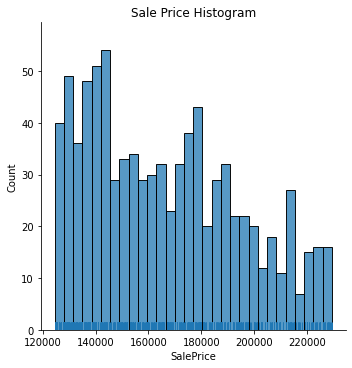

In [ ]:
#A seaborn histogram of the sale price
fig =plt.figure(figsize=(15,6))
sns.displot(data=sale_price,x='SalePrice',kind='hist',rug=True,bins=30,palette='lightblue')
plt.xlabel('SalePrice')
plt.title('Sale Price Histogram')
plt.show()

The histogram shows that most high prices fall in the range of 130,000 to 180,000, with only a few areas having prices above 180,000. The price distribution is skewed to the right, indicating that the central measurements are no longer the same.

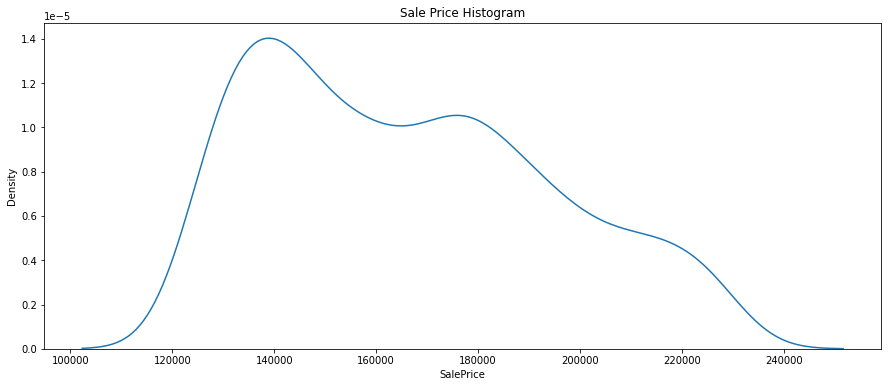

In [ ]:
#A seaborn kde of the sale price
fig =plt.figure(figsize=(15,6))
sns.kdeplot(sale_price['SalePrice'])
plt.xlabel('SalePrice')
plt.title('Sale Price Histogram')
plt.show()

The kde plot shows the estimated probability density of the sale price distribution. The highest density of prices is between 130,000 and 180,000. The skewness of the distribution is also evident from the plot, where the tail on the right side of the distribution is longer than the left side. This leads to a difference between the mean, median, and mode values.

<Figure size 1080x432 with 0 Axes>

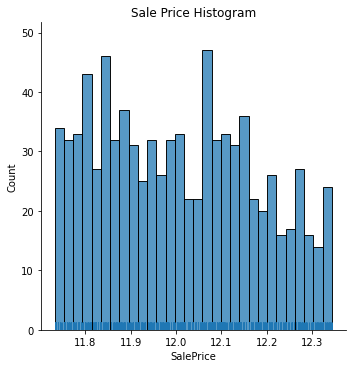

In [ ]:
#A seaborn histogram on the transformed sale price
fig =plt.figure(figsize=(15,6))
sns.displot(np.log1p(sale_price['SalePrice']),kind='hist',rug=True,bins=30,palette='lightblue')
plt.xlabel('SalePrice')
plt.title('Sale Price Histogram')
plt.show()

The graph shows a histogram of data that has been logarithmically transformed. The distribution of sale prices is still skewed to the right, indicating that the data is not uniformly distributed. The mean, median, and mode of the data are not the same. The transformation has helped to improve the normality of the data distribution, but further transformations may be needed to achieve a more Gaussian distribution.

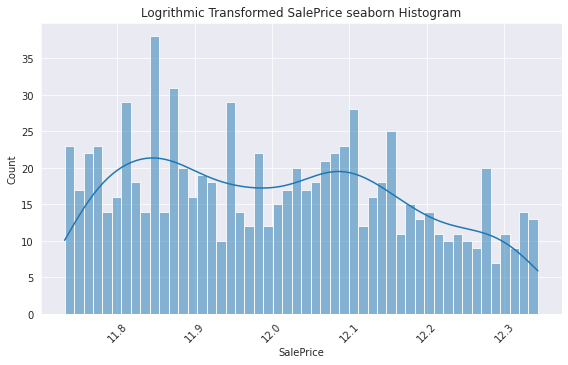

In [ ]:
#Seaborn age data set histogram
fig=plt.figure(figsize=(8,5))
sns.histplot(np.log1p(sale_price['SalePrice']), bins=50, kde=True)
plt.title('Logrithmic Transformed SalePrice seaborn Histogram')
plt.xlabel('SalePrice')
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

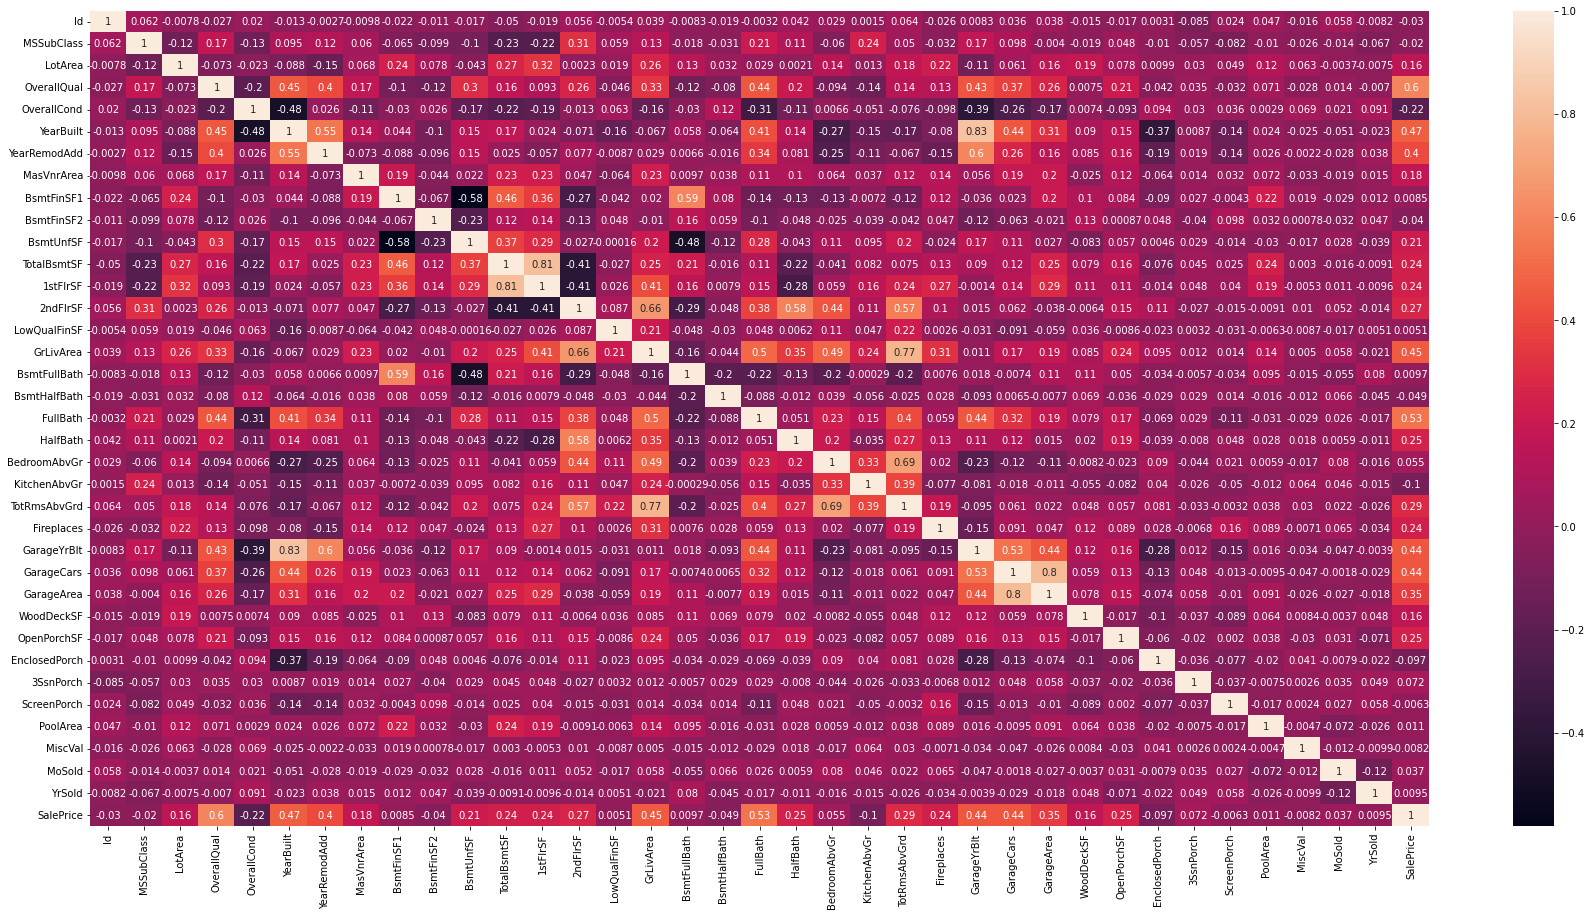

In [ ]:
# now let's investigate the independant variables and their correlations wiht the target.
fig=plt.figure (figsize=(30,15))
sns.heatmap(sale_price.corr(),annot=True)

The heatmap shows the correlation coefficients between different features in the dataset, and the darker shades indicate higher correlation. "OverallQual", "FullBath", and "GrLivArea" have the highest positive correlation coefficients with "SalePrice", indicating a strong positive relationship between these features and the sale price.



<Figure size 576x288 with 0 Axes>

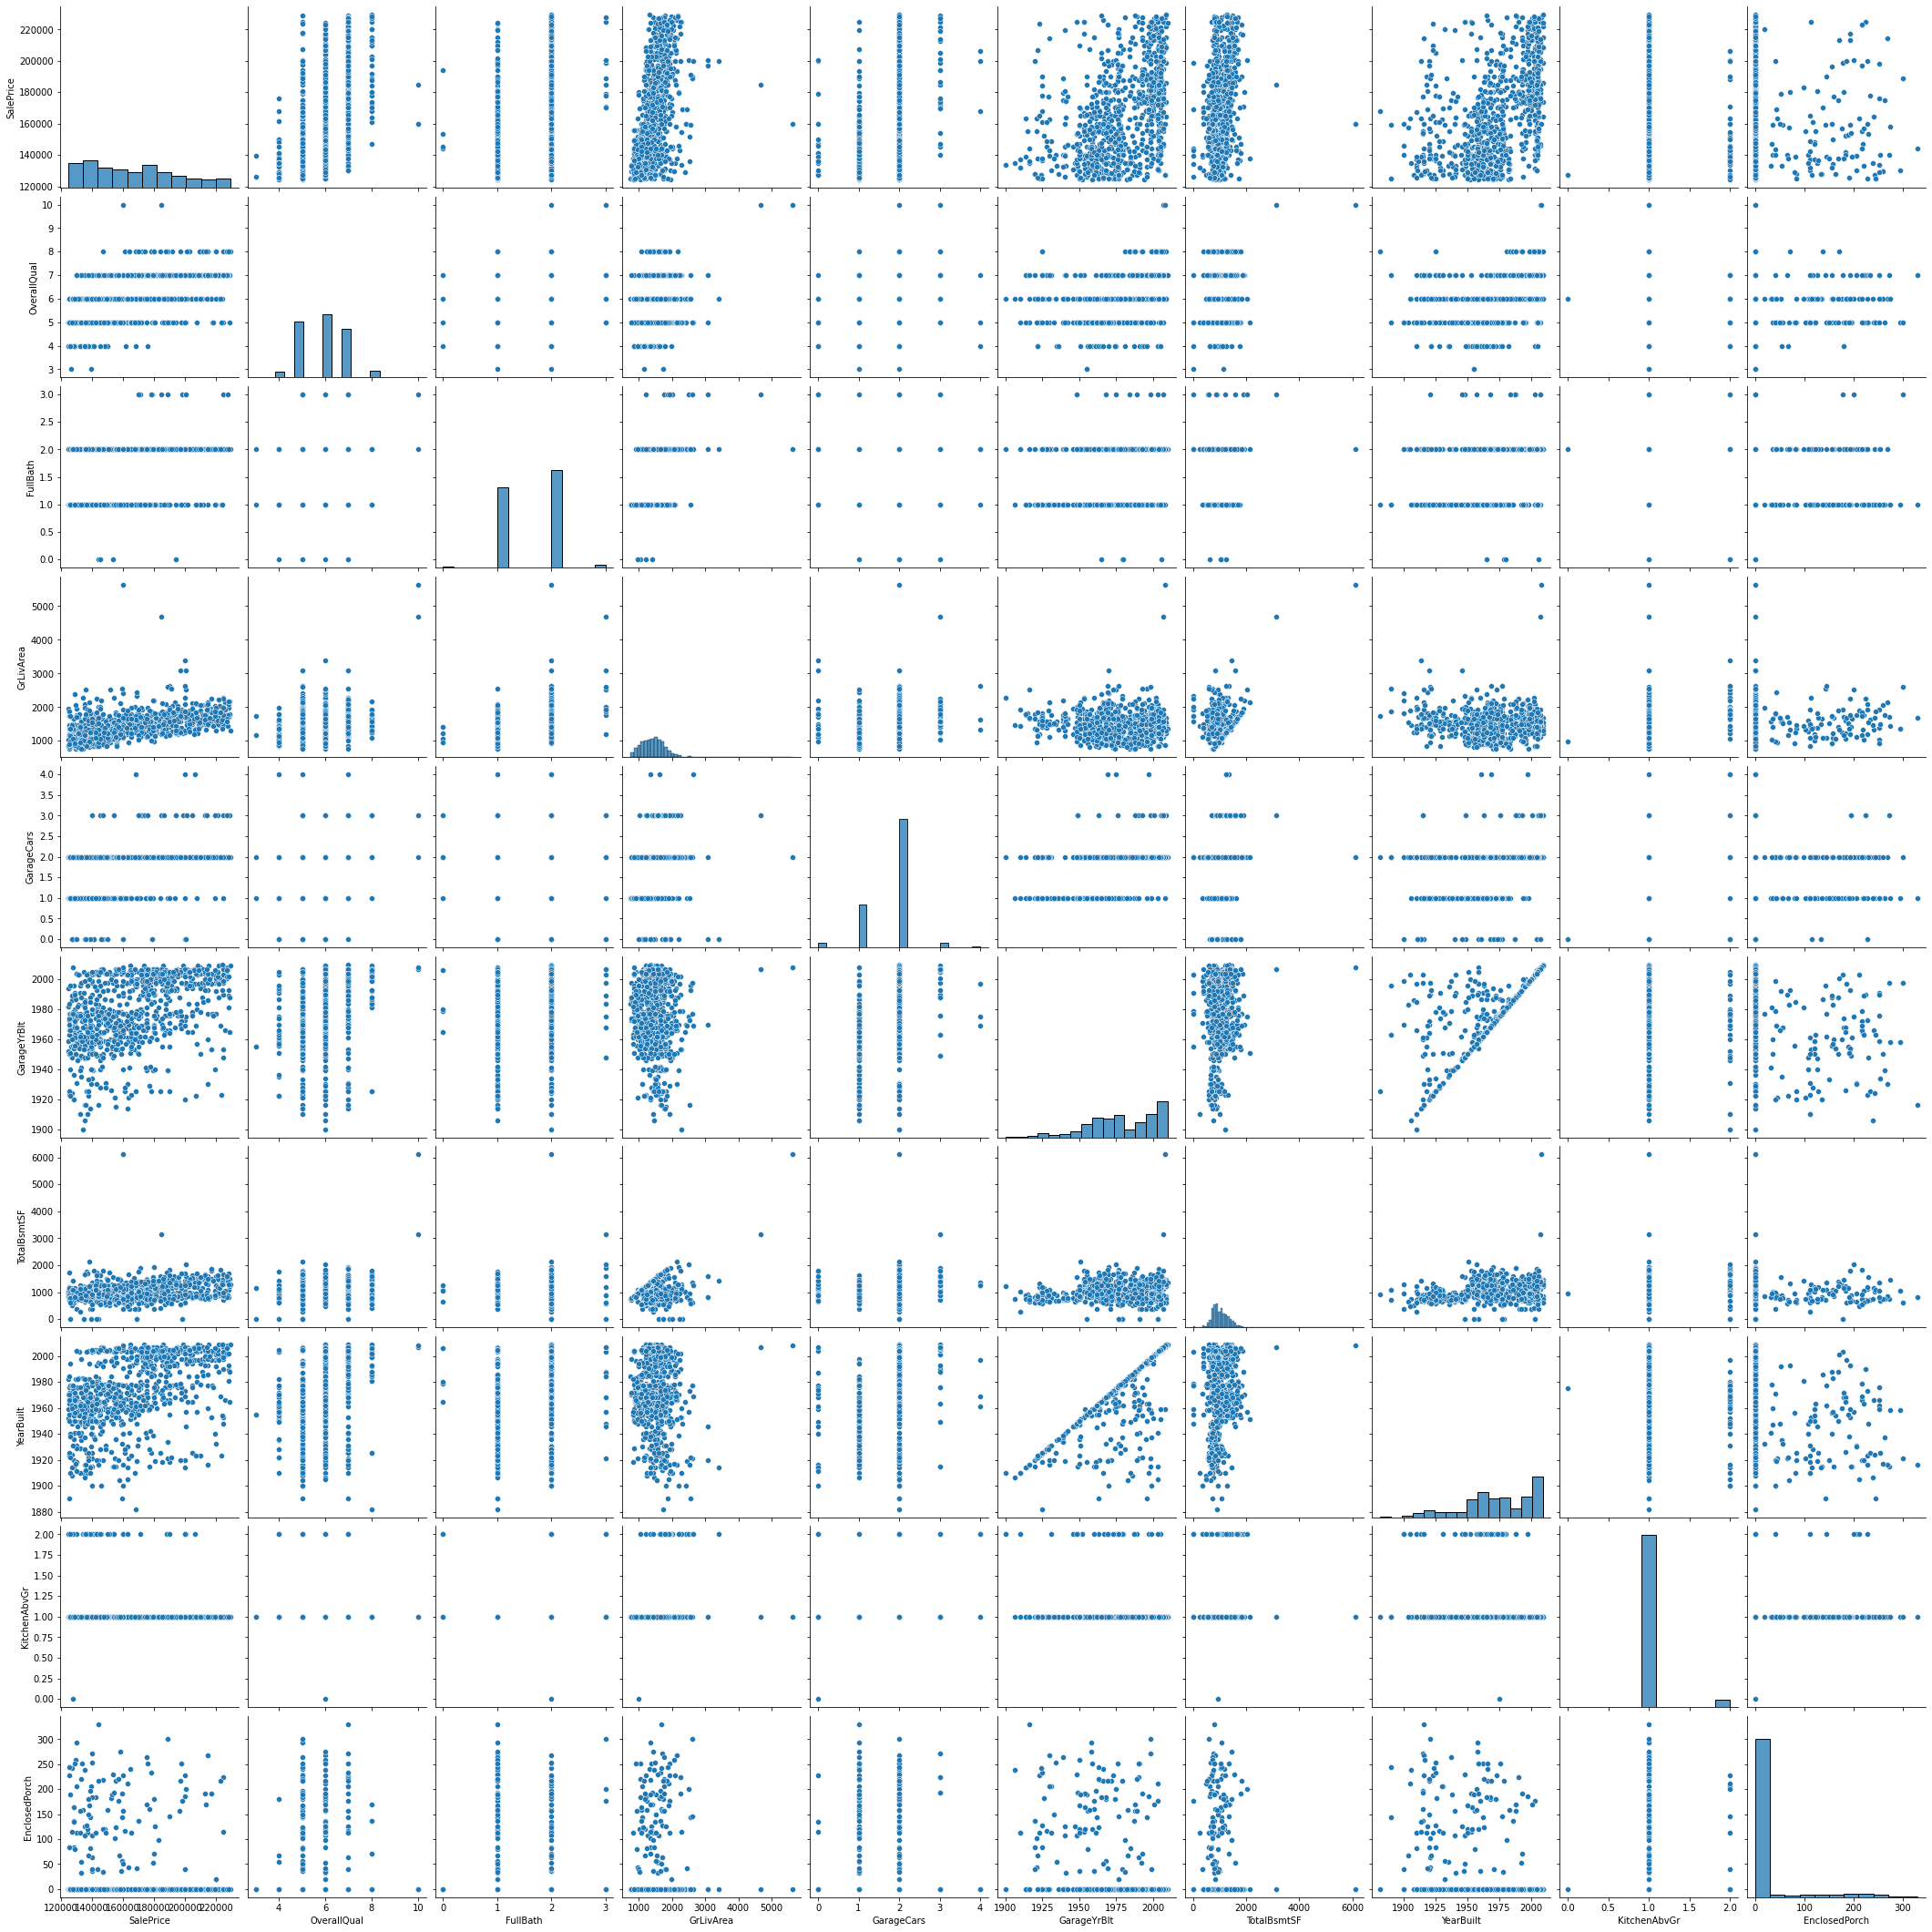

In [ ]:
#Seaborn pairplot of positive and negative features correlated to the sale price
arrtibutes=['SalePrice','OverallQual', 'FullBath','GrLivArea', 'GarageCars','GarageYrBlt', 'TotalBsmtSF', 'YearBuilt','KitchenAbvGr','EnclosedPorch']
fig=plt.figure (figsize=(8,4))
sns.pairplot(sale_price[arrtibutes], height=3)

To remove the GrLivArea outliers, we will only take the data points with GrLivArea values below 3000.

In [ ]:
sale_price=sale_price[(sale_price['GrLivArea']<3000) & (sale_price['TotalBsmtSF']<2000)]


<Figure size 576x288 with 0 Axes>

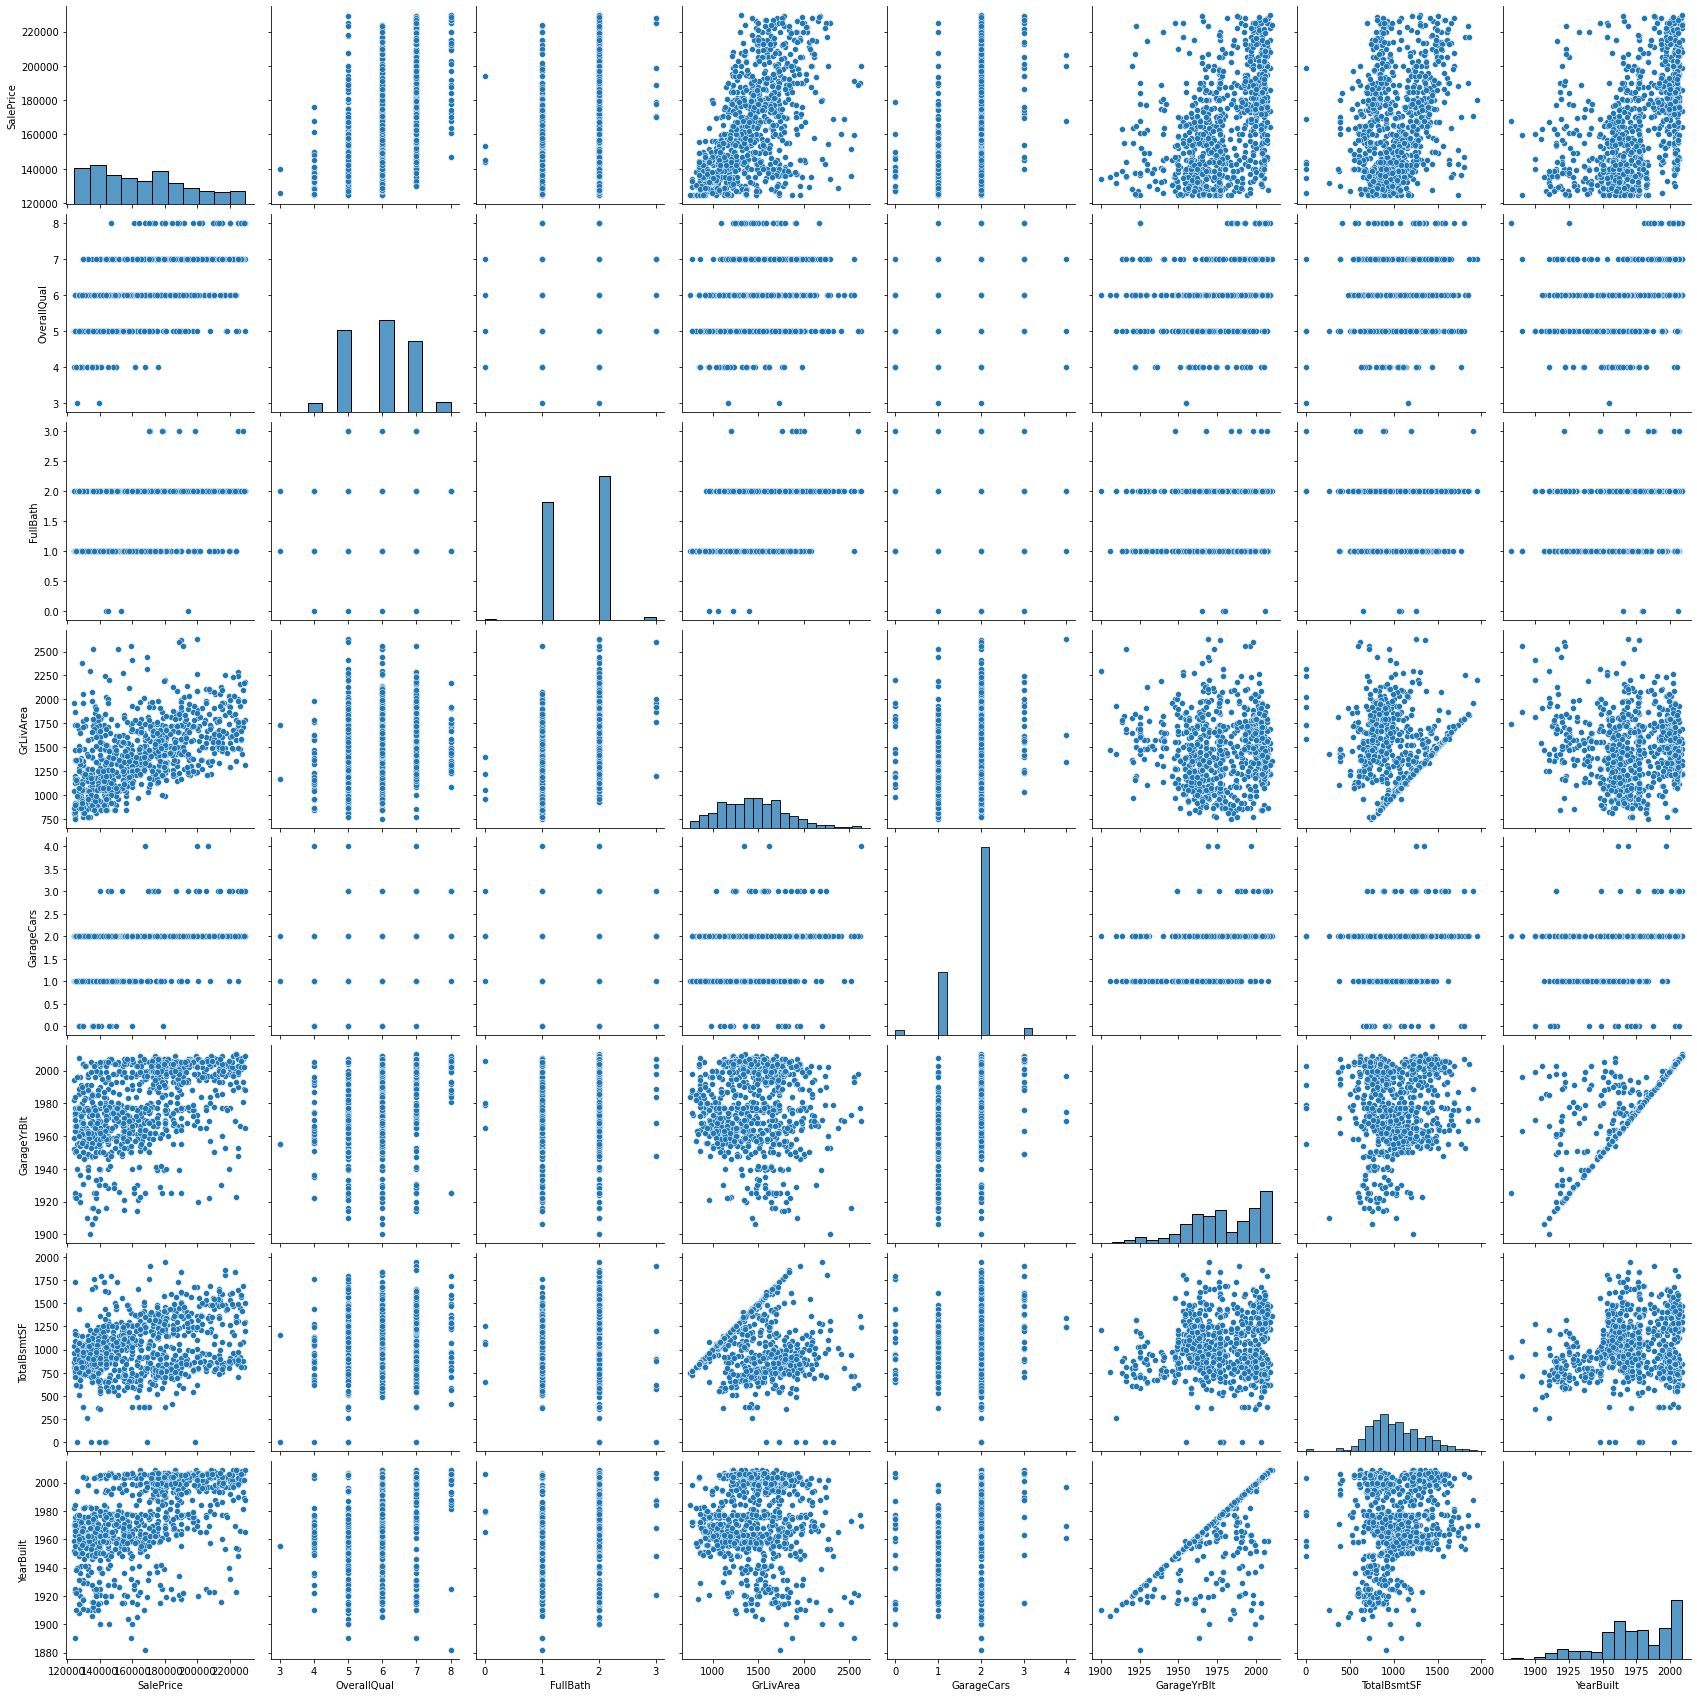

In [ ]:
arrtibutes=['SalePrice','OverallQual', 'FullBath','GrLivArea', 'GarageCars','GarageYrBlt', 'TotalBsmtSF', 'YearBuilt']
fig=plt.figure (figsize=(8,4))
sns.pairplot(sale_price[arrtibutes], height=3)

The outliars are removed, the data set is clean and good to feed to the machine learning algorithms.

<Figure size 864x360 with 0 Axes>

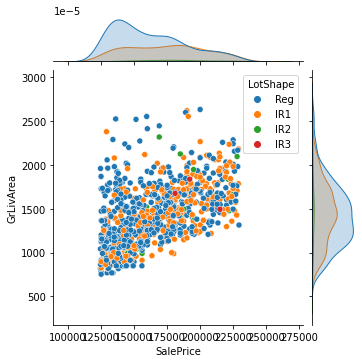

In [ ]:
#The seaborn joinplot of SalePrice to GrLivArea
fig=plt.figure(figsize=(12,5))
sns.jointplot(data =sale_price,x='SalePrice', y='GrLivArea', kind='scatter',height=5,dropna=True,hue='LotShape')
plt.show()

From the above seabron scatter plot, there is almost eqaul number of Regular and Slightly irregular sshape property. 

<Figure size 864x360 with 0 Axes>

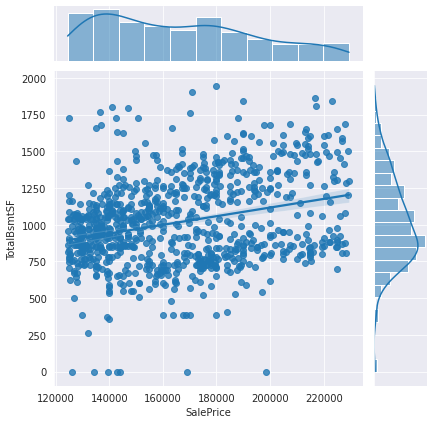

In [ ]:
#The seaborn joinplot of SalePrice to GrLivArea
fig=plt.figure(figsize=(12,5))
sns.jointplot(data =sale_price,x='SalePrice', y='TotalBsmtSF', kind='reg',dropna=True)
plt.show()

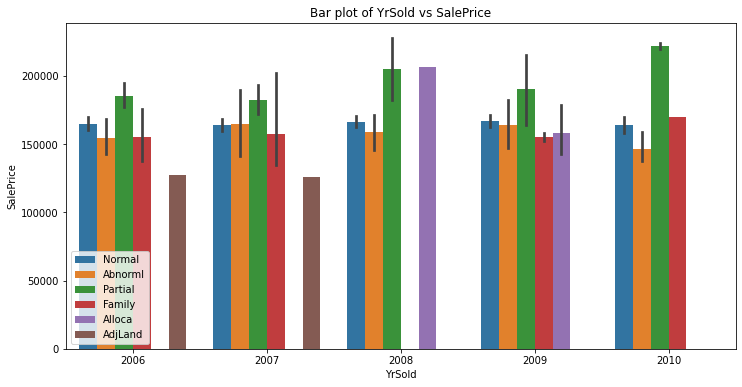

In [ ]:
# year sold and sale price based on the SaleCondition: Condition of sale
fig=plt.figure(figsize=(12,6))
sns.barplot(data=sale_price,x='YrSold',y='SalePrice',hue='SaleCondition')
plt.title('Bar plot of YrSold vs SalePrice')
plt.legend()
plt.show()

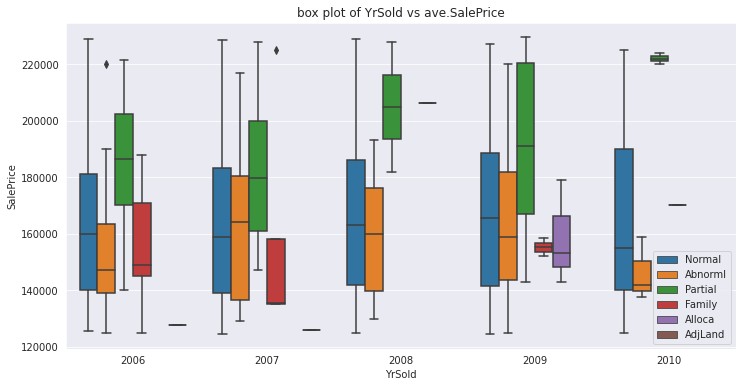

In [ ]:
fig=plt.figure(figsize=(12,6))
sns.boxplot(data=sale_price,x='YrSold',y='SalePrice',hue='SaleCondition')
plt.title('box plot of YrSold vs ave.SalePrice')
plt.legend()
plt.show()


Normal: Normal Sale

Abnorml:	Abnormal Sale -  trade, foreclosure, short sale

AdjLand:	Adjoining Land Purchase

Alloca:	Allocation: - two linked properties with separate deeds, typically condo with a garage unit	

Family:	Sale between family members

Partial:	Home was not completed when last assessed (associated with New Homes)

In the year 2006, the average price for a partial condition home was 185000, normal was 160000. Every year, the average price for howes was not completed was much higher than others. This seems homes that were not completed have higher demands than others. 

# **Modeling**

The Modeling phase is the phase in which machine learning models are trained and tested to select the best model that can solve the business problem. This phase involves the training of various regression models, ensemble regressors, and deep neural networks.

**The main task of this phase**:

**Model Selection**:
Select which machine learning algorithms is the best.

**Test design**: splitting the data into training, test, validation sets, or cross-validation. 

**Model development**: Fit models using the data prepared.

In this final capstone project, in addition to Linear regression and Ridge model, a RandomForestRegressor,AdaBoostRegressor, GradienrBoostRegressor,and DNN are trained and tested.

**Engineering Features**

It is a process of selecting, extracting, and transforming raw data into features that are more useful for machine learning algorithms.

Feature engineering is a critical step in building predictive models because the performance of a machine learning model heavily depends on the quality and relevance of the features used.

**Feature selection**: Selecting the most relevant features from the dataset based on statistical measures, domain knowledge, or machine learning algorithms.

**Feature extraction**: Creating new features by combining or transforming existing features, such as scaling, normalizing, binning, or one-hot encoding.

**Feature creation**: Creating new features by using external data sources, such as time series, spatial data, or text data.

**Feature representation**: Converting raw data into a suitable format for machine learning algorithms, such as image processing, natural language processing, or graph processing.

In [ ]:
#reqd the data set
sale_price.head()

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
5,50,RL,14115,Pave,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,Ex,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,Attchd,1993.0,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,700,10,2009,WD,Normal,143000


**Prepare the Data**

Preparing data is a crucial step in machine learning. This is including spliting the data set into features and target set. 

X represents all the features and y is the target

In [ ]:
#Prepare the data into the features and target
#Let X contains all features and y is the target
X=sale_price.drop('SalePrice', axis=1)
y=sale_price['SalePrice']

In [ ]:
#grabbing all features that have an object data type
categorical_columns=[]
for column in X.columns:
  if X[column].dtypes=='object':
    categorical_columns.append(column)

In [ ]:
#Converting categorical features into numerical
#There are four features that are encoded using OrdinalEncoder and the rest are encoded using OneHotEncoder

#attributes that are endoded by using OneHotEncoder
ohe_columns=['MSZoning','Street','LotShape','Utilities','LotConfig','LandSlope','Neighborhood','Condition1','Condition2','BldgType','HouseStyle','RoofStyle',
  'RoofMatl','Exterior1st','Exterior2nd','MasVnrType','Foundation','BsmtExposure','BsmtFinType1','BsmtFinType2','Heating','CentralAir','Electrical','Functional',
  'GarageType','GarageFinish','PavedDrive','SaleType','SaleCondition','LandContour','BsmtQual','BsmtCond','GarageQual','GarageCond']

#Attributes that are encoded by using Ordinalencoder
oe_columns=['ExterQual','ExterCond','HeatingQC','KitchenQual']

In [ ]:
#preprering a transformer
#This transformer comprise a OneHotEncoder for those features require a OneHot Encoding and OridinalEncoder for features require an Ordinal Encoding.
# Moreover, this transfoprmer also includes a data Standard Scaler to scale the data.
transformer=make_column_transformer(((OneHotEncoder(drop='if_binary'),ohe_columns)),
                                          (OrdinalEncoder(categories=[['Fa','TA', 'Gd','Ex']]),['ExterQual']),
                                          (OrdinalEncoder(categories=[['Fa','TA', 'Gd','Ex']]),['ExterCond']),
                                          (OrdinalEncoder(categories=[['Fa','TA', 'Gd','Ex']]),['HeatingQC']),
                                          (OrdinalEncoder(categories=[['Fa','TA', 'Gd','Ex']]),['KitchenQual']),
                                          remainder=StandardScaler())

In [ ]:
#Fitting the data into the transformer prepared above and converting into arrat using toarry() function
transformed_data=transformer.fit_transform(X).toarray()

In [ ]:
#Preparing the data Frame for the transformed datas
data=pd.DataFrame(transformed_data)

#Filling or dropping the missing values
#The missing values has been filled by the average of their corresponding existing feature values
data.fillna(data.mean(),inplace=True)

**Train/Test Split**

Train-test split is a common technique used in machine learning to evaluate the performance of a machine learning model. It involves dividing the available data into two parts: one for training the model and the other for testing the model.

The training set is used to train the machine learning model to learn patterns in the data and make predictions, while the testing set is used to evaluate the performance of the model on unseen data.


In [ ]:
#split the data into training set and testing set
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.30, random_state=42)

**Principal Component Analysis (PCA)**

In [ ]:
#Principal Component Analysis (PCA)
#Principal Component Analysis (PCA) is applied to reduce the dimensions
#PCA is a linear method that seeks to find the directions of maximum variance in the data 
#It is computationally efficient, can handle large datasets effectively, and faster
pca=PCA()
transformed_train=pca.fit_transform(X_train)
n_comp=pca.n_components_
explained_variance_ratio=pca.explained_variance_ratio_

Text(0.5, 1.0, 'scree plot')

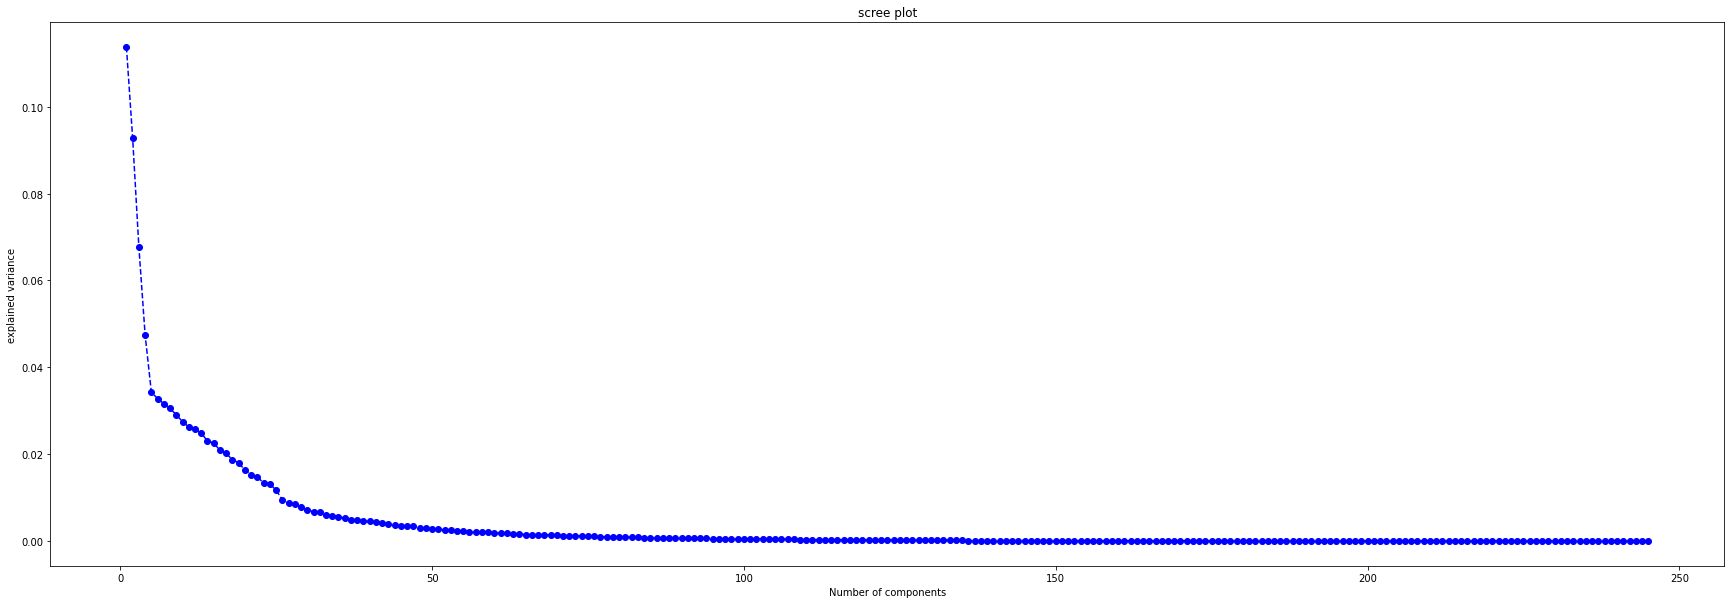

In [ ]:
# the scree plot of the Principal components
n_comp=np.arange(pca.n_components_)+1
plt.figure(figsize=(30,10))
plt.plot(n_comp,pca.explained_variance_ratio_,'--o', color='blue')
plt.xlabel('Number of components')
plt.ylabel('explained variance')
plt.title('scree plot')

From the above scree plot, only 10 features are used 

In [ ]:
#Calculating the eigen values and the percentage of explained variance
eigenvalue=pca.explained_variance_
pca.singular_values_
#Direct calcculating of the percentage of explained variance fromn the instantiate PCA
explained_variance_ratio=pca.explained_variance_ratio_

#Hand crafted calculating of the percentage of expained variance
explained_variance_ratio=eigenvalue/(eigenvalue.sum()) 

In [ ]:
#Total number of components and the cummulative sum of the percentage of expained variance
print(f'the total number of components are:{pca.n_components_}')

##To select the desired number of components to keep the cumulative sum of the percentage of expained variance
print(f'the principal components which necessary to retain 90% of the explained variance are:{int((np.cumsum(pca.explained_variance_ratio_)<0.9).sum())}')

the total number of components are:245
the principal components which necessary to retain 90% of the explained variance are:42


**t-distributed stochastic neighbor embedding (t-SNE)**

In [ ]:
#A t-SNE data transformer has been trained. The model set only two components to see the scatter plot
# It is a non-linear method 
#more suitable for data that has a non-linear structure and can effectively capture complex relationships in the data.
#it is computationally expensive and may not scale well to large datasets.
tsne = TSNE(n_components=2, n_iter=10000, random_state=42)
projected_df = tsne.fit_transform(X_train)
projection = pd.DataFrame( data=projected_df,columns=['X1', 'X2'])
projection['SalePrice'] = sale_price['SalePrice']
projection.fillna(projection.mean(),inplace=True)

In [ ]:
projection.head()

,X1,X2,SalePrice
0,-12.355156,-19.416382,208500.000000
1,-17.770828,-2.694307,181500.000000
2,26.264380,10.635989,223500.000000
3,0.011674,26.592342,140000.000000
4,12.579021,8.542243,167213.630814


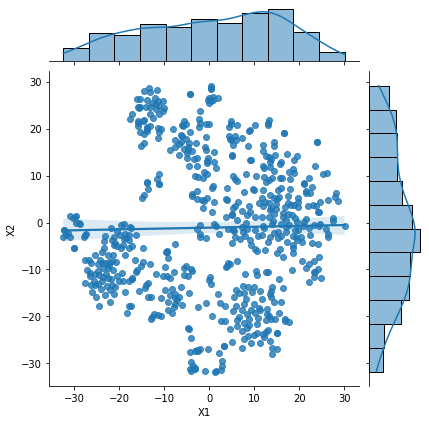

In [ ]:
#A seaborn jointplot is run and the kind set to "reg" to see the regression line
sns.jointplot(data=projection,x='X1',y='X2', kind='reg',color=None, palette='coolwarm')
plt.show()

From the above seaborn jointplot, the features are correlated to each other. A regression models will fit well. 

**Prapering Pipe Lines**

Pipe line is a sequence of steps that are performed to transform and prepare data, train a machine learning model, and make predictions on new data.

pipeline typically consists of the following steps:

**Data preprocessing**: This step involves cleaning, transforming, and formatting data so that it can be used by the machine learning algorithm. This may include tasks such as handling missing values, scaling, normalization, or one-hot encoding of categorical variables.

**Feature engineering**: This step involves selecting, extracting, and transforming features from the data to create a set of features that will enable the machine learning algorithm to learn patterns and make accurate predictions.

**Model selection**: This step involves choosing the appropriate machine learning algorithm that is most suited for the problem being solved. 

In [ ]:
#Linear Regression Model
#The Linear regression Model includes pca,polynomial features,feature selector and classifier
#Becuase of the computer processor speed, only 10  principal componets are considered
#The biases are excluded in the ploynomial features
# The LASSO model is used to select the best features in the SequentialFeatureSelector. 
#A forward direction has been used. The model tried only five cross validation.
#Last a linear Regression model has been trained
lr_pipe=Pipeline(
    steps=[('pca',PCA(n_components=10)),
           ('polyFeatures',PolynomialFeatures(include_bias=False)),
           ('feature_selector',SequentialFeatureSelector(estimator=Lasso(max_iter=10000,),direction='forward',cv=5)),
           ('lr_model',LinearRegression())])

#Ridge Model
#The Ridge Model includes polynomail features and classifier
#The biases are excluded in the ploynomial features
#Last a Ridge model has been trained
ridge_pipe=Pipeline(
    steps=[('pca',PCA(n_components=10)),
           ('polyFeatures',PolynomialFeatures(include_bias=False)),
           ('ridge_model',Ridge(solver='lsqr',max_iter=10000,random_state=42))])

**Hyperparameter tuning**

Hyperparameter tuning is an important step in machine learning that involves selecting the optimal set of hyperparameters for a given algorithm to improve its performance.

The process of tuning hyperparameters involves trying out different values for each hyperparameter and evaluating the performance of the resulting model using a validation set. The optimal set of hyperparameters is then selected based on the performance metrics of the validation set.

In [ ]:
#SequentialFeatureSelector hyperparamers dictionary
#The number of features selected and polynomial features are tunned

params_linear = {'polyFeatures__degree':[1,2,3],
                 'feature_selector__n_features_to_select': [1,2,3]}  

#Ridge model hyperparamers dictionary
#Only the learning rate is tunned
params_ridge = {'polyFeatures__degree':[2,3,4,5],
                'ridge_model__alpha':[0.001,0.1,1]}

**Methods for tuning hyperparameters**

**Grid search**: This involves specifying a range of values for each hyperparameter and trying out all possible combinations of these values. Grid search can be computationally expensive for large hyperparameter spaces, but it ensures that all possible combinations of hyperparameters are evaluated.

**Random search**: This involves randomly selecting values for each hyperparameter within a specified range and evaluating the performance of the resulting model. Random search can be more efficient than grid search for large hyperparameter spaces.


In [ ]:
#Grid Search:
#Linear Regression model Grid search
lr_grid=GridSearchCV(estimator=lr_pipe,param_grid=params_linear,cv=5)

#Ridge model Grid search
ridge_grid=GridSearchCV(estimator=ridge_pipe,param_grid=params_ridge,cv=5)

**Train the Models**

Training a machine learning model involves using an algorithm to learn patterns from the training data and make predictions on new data

In [ ]:
#First a baseline model has been trained.This is a simple model
bl_start_time=time.time()
baseline_train = np.ones(shape = y_train.shape)*y_train.mean()
baseline_test = np.ones(shape = y_test.shape)*y_test.mean()
mse_bl_train = mean_squared_error(baseline_train, y_train)
mse_bl_test = mean_squared_error(baseline_test, y_test)
mae_bl_train =mean_absolute_error(baseline_train, y_train)
mae_bl_test = mean_absolute_error(baseline_test, y_test)
train_rmse_bl=math.sqrt(mse_bl_train)
test_rmse_bl=math.sqrt(mse_bl_test)
train_rscore_bl=r2_score(baseline_train, y_train)
test_rscore_bl=r2_score(baseline_test, y_test)

bl_end_time=time.time()
bl_time=(bl_end_time-bl_start_time)

In [ ]:
#Train Linear regression classifier
lr_start_time=time.time()
lr=lr_grid.fit(X_train,y_train)
lr_end_time=time.time()
lr_training_time=lr_end_time-lr_start_time

In [ ]:
#Models best parameters, scores, and Time taken
print(f'Linear Regression best parameters:{lr.best_params_}')
print(f'Linear Regression best score:{lr.best_score_}')
print(f'The Linear regression model train time is:{lr_training_time}')

Linear Regression best parameters:{'feature_selector__n_features_to_select': 3, 'polyFeatures__degree': 1}
Linear Regression best score:0.5965159576803326
The Linear regression model train time is:122.45729541778564


The Linear Regression model scored 0.5965159576803326 and take 122.45729541778564 seconds to train the model. The model select 3 features and use a degree 1 polynomial. 

In [ ]:
#Train Ridge classifier
ridge_start_time=time.time()
ridge=ridge_grid.fit(X_train,y_train)
ridge_end_time=time.time()
ridge_training_time=ridge_end_time-ridge_start_time

In [ ]:
#Models best parameters, scores, and Time taken
print(f'Ridge best parameters:{ridge.best_params_}')
print(f'Ridge best score:{ridge.best_score_}')
print(f'The Ridge model train time is:{ridge_training_time}')

Ridge best parameters:{'polyFeatures__degree': 2, 'ridge_model__alpha': 1}
Ridge best score:0.40784847969833693
The Ridge model train time is:14.68600845336914


The Ridge model scored 0.40784847969833693 the same as Linear Regression models and take only 14.68600845336914 seconds to train. This model is much fater than the linear regression interms of computation. The model use a ploynomial degree 2 and select 1 an alpha value. 

###** Regression Model performance evaluating tools**

**Mean Squared Error (MSE)**: MSE measures the average squared difference between the predicted values and the actual values. A lower MSE indicates better performance.

**Root Mean Squared Error (RMSE)**: RMSE is the square root of the MSE and is in the same units as the target variable. This makes it more interpretable than the MSE.

**Coefficient of Determination (R²)**: R² measures the proportion of variance in the target variable that is explained by the model. A higher R² indicates better performance. However, R² should be used in conjunction with other metrics as it has some limitations.

**Mean Absolute Error (MAE)**: MAE measures the average absolute difference between the predicted values and the actual values. It is less sensitive to outliers than MSE.

**Visualizations**: Visualizations such as residual plots, scatter plots of predicted vs actual values, and distribution plots can give you a better understanding of the performance of your model.

**Linear Regression Model training and Testing error**

In [ ]:
#Predictions of linear regression model on the train and test data set
train_lr_pred=lr_grid.predict(X_train)
test_lr_pred=lr_grid.predict(X_test)

In [ ]:
#metrics of linear Regression model
train_mse_lr=mean_squared_error(y_train,train_lr_pred)
test_mse_lr=mean_squared_error(y_test,test_lr_pred)
train_mae_lr=mean_absolute_error(y_train,train_lr_pred)
test_mae_lr=mean_absolute_error(y_test,test_lr_pred)
train_rmse_lr=math.sqrt(train_mse_lr)
test_rmse_lr=math.sqrt(test_mse_lr)
train_rscore_lr=r2_score(y_train,train_lr_pred)
test_rscore_lr=r2_score(y_test,test_lr_pred)

**Ridge Model Training and testing Error**

In [ ]:
#Predictions of Ridge regression model on the train and test data set
train_ridge_pred=ridge_grid.predict(X_train)
test_ridge_pred=ridge_grid.predict(X_test)

In [ ]:
#metrics of Ridge Regression model
train_mse_rd=mean_squared_error(y_train,train_ridge_pred)
test_mse_rd=mean_squared_error(y_test,test_ridge_pred)
train_mae_rd=mean_absolute_error(y_train,train_ridge_pred)
test_mae_rd=mean_absolute_error(y_test,test_ridge_pred)
train_rmse_rd=math.sqrt(train_mse_rd)
test_rmse_rd=math.sqrt(test_mse_rd)
train_rscore_rd=r2_score(y_train,train_ridge_pred)
test_rscore_rd=r2_score(y_test,test_ridge_pred)

Even though both models have smaller error than the baseline model, the Ridge model has much smaller error and much faster than the Linear regression model. However, the model have a larger errorn on the test data than Linear Regression model. 

In [ ]:
# Dataframe all models 
pd.DataFrame({'Models':['BaseLine Model','LinearRegression Model','Ridge Model'],
              'Train_mse_Error':[mse_bl_train,train_mse_lr,train_mse_rd],
              'Test_mse_Error':[mse_bl_test,test_mse_lr,test_mse_rd], 
               'Train_rmse_Error':[train_rmse_bl,train_rmse_lr,train_rmse_rd],
              'Test_rmse_Error':[test_rmse_bl,test_rmse_lr,test_rmse_rd],
              'Train_mae_Error':[mae_bl_train,train_mae_lr,train_mae_rd],
              'Test_mae_Error':[mae_bl_test,test_mae_lr,test_mae_rd], 
              'Train_rscore':[train_rscore_bl,train_rscore_lr,train_rscore_rd],
              'Test_rscore':[test_rscore_bl,test_rscore_lr,test_rscore_rd],
              'Time in Seconds':[bl_time,lr_training_time,ridge_training_time]}).set_index('Models')



,Train_mse_Error,Test_mse_Error,Train_rmse_Error,Test_rmse_Error,Train_mae_Error,Test_mae_Error,Train_rscore,Test_rscore,Time in Seconds
Models,,,,,,,,,
BaseLine Model,8.244401e+08,7.997387e+08,28713.065053,28279.651823,24529.000717,23979.593029,0.000000,0.000000,0.006865
LinearRegression Model,3.299755e+08,2.526336e+08,18165.228315,15894.452328,13821.869402,12187.865424,0.599758,0.684105,122.457295
Ridge Model,2.230870e+08,1.847917e+08,14936.096815,13593.811908,11161.163881,10066.800706,0.729408,0.768935,14.686008


The note presents a comparison of linear regression and Ridge model errors of all metrics. Both models are performing better than the baseline model, with no significant difference in metrics between training and testing errors, indicating good training and testing performance and the ability to capture important features. The Ridge model has higher r_score on both the training and testing set. The Ridge model has 73% r_score on the training set and 77% on the testing set. But,the Linear regression model takes longer to train. However, both models require some feature engineering to improve their performance.

**Note**:We are assumed that only 10 components.

###**Work added to the final capstone project**:
The following listed below, advanced models are add to previous capstone projetc 1.

1. **RandomForestRegressor**
RandomForestRegressor is a machine learning algorithm used for regression tasks, which involves predicting a continuous output variable. It is an ensemble method that combines multiple decision trees to make predictions.

RandomForestRegressor has several advantages over single decision tree models. It can handle high-dimensional datasets and is less prone to overfitting. It can also capture complex nonlinear relationships between the input features and output variable.


2. **AdaBoostRegressor**:
AdaBoostRegressor is a machine learning algorithm used for regression tasks, which involves predicting a continuous output variable. It is an ensemble method that combines multiple weak learners to make predictions.

In AdaBoostRegressor, a series of weak learners (usually decision trees) are trained sequentially, where each subsequent tree in the series tries to correct the errors made by the previous tree. During training, each weak learner is given a weight that determines its contribution to the final prediction. The weights are adjusted in each iteration based on the performance of the previous weak learners.


3. **GradientBoostingRegressor**:

GradientBoostingRegressor is a machine learning algorithm used for regression tasks, which involves predicting a continuous output variable. It is an ensemble method that combines multiple weak learners to make predictions.

In GradientBoostingRegressor, a series of weak learners (usually decision trees) are trained sequentially, where each subsequent tree in the series tries to correct the errors made by the previous tree. During training, each weak learner is trained on the residual errors of the previous weak learners.

Both AdaBoostRegressor and GradientBoostingRegressor have several advantages over single weak learners like RandomForestregressor. It can handle high-dimensional datasets and is less prone to overfitting. It can also capture complex nonlinear relationships between the input features and output variable.


4. **Deep Neural Network**:

A Deep Neural Network (DNN) is a type of artificial neural network (ANN) that has multiple layers between the input and output layers. Each layer consists of a set of interconnected nodes or neurons, which perform a mathematical operation on the input data and pass the result to the next layer.

DNNs can be structured in various ways, such as feedforward, convolutional, or recurrent neural networks, and can have a varying number of layers and neurons. 

**Prepareing a Pipe line**

In [ ]:
#Random Forest regressor pipeline
#The Random Forest Regressor model pipe line has A PCA to reduce the dimension of the number of features and 
#The regressor model to compute the process. For processing speed only 10 componets are considered. 
rfr_pipe=Pipeline(
    steps=[('pca',PCA(n_components=10)),
           ('rfr_model',RandomForestRegressor())])

#AdaBoost regressor model pipeline
#The adabtive Bossting model pipe line like a random forest model has a PCA to reduce the dimension of the number of features and 
#The adaBoostregressor to compute the process. For processing speed only 10 componets are considered here also. 
ada_boost_pipe=Pipeline(
    steps=[('pca',PCA(n_components=10)),
           ('ab_model',AdaBoostRegressor())])

#Gradient Boost model pipeline
#The gradient Bossting model pipe line like a random forest and adaboost has a PCA to reduce the dimension of the number of features and 
#The adaBoostregressor to compute the process. For processing speed only 10 componets are considered here also. 
gb_pipe=Pipeline(
    steps=[('pca',PCA(n_components=10)),
           ('gb_model',GradientBoostingRegressor())])


**Hyperparameter tuning**

In [ ]:
#random Forest regressor parameters to tune
#In this Randomforest hyperparameter tuning, only number of estimators, max depth of the tree,minimum sample spilt, the criterion, and minimum sample leaf are tunned,
#Since this model is a regressor model a 'squared_error' and 'absolute_error' are taken as a criterion. The model will check upto 2,4,6 maximun depth of the tree. 
rfr_params={'rfr_model__n_estimators':[50,100,200],
              'rfr_model__max_depth':[2,4,6],
              'rfr_model__min_samples_split':[1,2,3],
              'rfr_model__criterion': ['squared_error','absolute_error'],
              'rfr_model__min_samples_leaf':[1,2,3]}

#Ada Boosting regressor parameters which are tuned
#In adaptive Boosting only the number of estimators and learning rate are tunned. 50,100,200 number of estimators are tried. 
ada_params = {'ab_model__n_estimators': [50,100,200],
              'ab_model__learning_rate':[0.5,1,2]}

#Gradient Boosting regressor parameters which are tuned
#In the gradient Boosting model like the Random Forest Regressor, number of estimators, max depth of the tree,
#minimum sample spilt, and minimum sample leaf are tunned. 2,4,6 are the maximum depth of the tree requested the model to check. 
gb_params ={'gb_model__n_estimators':[50,100,200],
            'gb_model__max_depth':[2,4,6],
            'gb_model__min_samples_split':[1,2,3],
            'gb_model__min_samples_leaf':[1,2,3]}

**Training Models**

In [ ]:
#Train the model on the Gridsearch

#RandomForestRegressor
#In this work a GridSeachCv method is considered to search the desired hyperparameters for each models. 
#The modle fit the training dataset and calculated the time
start_time=time.time()
rfr_grid=GridSearchCV(estimator=rfr_pipe,param_grid=rfr_params)
rfr_grid.fit(X_train,y_train)
end_time=time.time()
print(end_time-start_time)

787.6484789848328


In [ ]:
#Models best parameters, scores, and Time taken
print(f'Ridge best parameters:{rfr_grid.best_params_}')
print(f'Ridge best score:{rfr_grid.best_score_}')

Ridge best parameters:{'rfr_model__criterion': 'squared_error', 'rfr_model__max_depth': 6, 'rfr_model__min_samples_leaf': 3, 'rfr_model__min_samples_split': 2, 'rfr_model__n_estimators': 100}
Ridge best score:0.6247837118093992


The RandomForestRegressor best hyperparameters, which are selected by the GridSearchCv method are 'Squared_error' for criterion,maximum depth 6,minimum sample leaf 2, and a 100 number of estimators.

**Random Forest Regressor Error**

In [ ]:
#Predictions of Random Forest Regressor on the train and test data set
train_rfr_pred=rfr_grid.predict(X_train)
test_rfr_pred=rfr_grid.predict(X_test)

In [ ]:
#metrics of Random forest Regressor
train_mse_rfr=mean_squared_error(y_train,train_rfr_pred)
test_mse_rfr=mean_squared_error(y_test,test_rfr_pred)
train_rmse_rfr=math.sqrt(train_mse_rfr)
test_rmse_rfr=math.sqrt(test_mse_rfr)
train_mae_rfr=mean_absolute_error(y_train,train_rfr_pred)
test_mae_rfr=mean_absolute_error(y_test,test_rfr_pred)
train_rscore_rfr=r2_score(y_train,train_rfr_pred)
test_rscore_rfr=r2_score(y_test,test_rfr_pred)

**Ada boost Regressor**

In [ ]:
#In this work also aGridSeachCv method is considered to search the desired hyperparameters for the model. 
#The modle is fit to the training dataset and calculated the time
start_time=time.time()
adaboost_grid=GridSearchCV(estimator=ada_boost_pipe,param_grid=ada_params)
adaboost_grid.fit(X_train,y_train)
end_time=time.time()
adaboost_time=end_time-start_time

In [ ]:
#Models best parameters, scores, and Time taken
print(f'Ridge best parameters:{adaboost_grid.best_params_}')
print(f'Ridge best score:{adaboost_grid.best_score_}')

Ridge best parameters:{'ab_model__learning_rate': 2, 'ab_model__n_estimators': 100}
Ridge best score:0.5671387716640072


Adaptive Boosting Regressor best parameters: 100 number of estimator and 2 learnign rate and the model score 0.5671387716640072

**AdaBoost Regressor Error**

In [ ]:
#Predictions of Adaptive Boosting Regressor on the train and test data set
train_db_pred=adaboost_grid.predict(X_train)
test_db_pred=adaboost_grid.predict(X_test)

In [ ]:
#metrics of Adaptive Boosting Regressor
train_mse_db=mean_squared_error(y_train,train_db_pred)
test_mse_db=mean_squared_error(y_test,test_db_pred) 
train_rmse_db=math.sqrt(train_mse_db)
test_rmse_db=math.sqrt(test_mse_db)
train_mae_db=mean_absolute_error(y_train,train_db_pred)
test_mae_db=mean_absolute_error(y_test,test_db_pred)
train_rscore_db=r2_score(y_train,train_db_pred)
test_rscore_db=r2_score(y_test,test_db_pred)

**Gradient Boosting regressor**

In [ ]:
#Gradient Boosting regressor
#In this work also aGridSeachCv method is considered to search the desired hyperparameters for the model. 
#The modle is fit to the training dataset and calculated the time
start_time=time.time()
grb=GridSearchCV(estimator=gb_pipe,param_grid=gb_params)
grb.fit(X_train,y_train)
end_time=time.time()
grb_time=end_time-start_time

In [ ]:
#Models best parameters, scores, and Time taken
print(f'Ridge best parameters:{grb.best_params_}')
print(f'Ridge best score:{grb.best_score_}')

Ridge best parameters:{'gb_model__max_depth': 2, 'gb_model__min_samples_leaf': 3, 'gb_model__min_samples_split': 1, 'gb_model__n_estimators': 100}
Ridge best score:0.631906295251052


The GradientBoostRegressor best hyperparameters, which are selected by the GridSearchCv method are ,maximum depth 2,minimum sample leaf 3, minimum sample splits 1,and a 100 number of estimators.

**Gradient Boosting Error**

In [ ]:
#Predictions of Gradient Boosting Regressor on the train and test data set
train_grb_pred=grb.predict(X_train)
test_grb_pred=grb.predict(X_test)

In [ ]:
#metrics of Gradient Boosting regressor
train_mse_grb=mean_squared_error(y_train,train_grb_pred)
test_mse_grb=mean_squared_error(y_test,test_grb_pred) 
train_rmse_grb=math.sqrt(train_mse_grb)
test_rmse_grb=math.sqrt(test_mse_grb)
train_mae_grb=mean_absolute_error(y_train,train_grb_pred)
test_mae_grb=mean_absolute_error(y_test,test_grb_pred)
train_rscore_grb=r2_score(y_train,train_grb_pred)
test_rscore_grb=r2_score(y_test,test_grb_pred)

**Deep Neural Network**

In [ ]:
#Artificial Neural network
ealy_stop=EarlyStopping(
    monitor="val_loss",
    min_delta=0,
    patience=10,
    verbose=0,
    mode="min",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0)

In [ ]:
#This deep neural network has four hidden laryers. The first hidden layer has 64 neurons, the second 128 neurons,
# third 256 neurons and the last hidden layer has 512 neurons. For the last layer 0.2 are dropped out. All hidden layers have a 'relu' activation function and 
#the output layer has a linear activation function. The model use a 'Adam' optimizer and calculated the 'mae' and 'mse' losses. 

model =Sequential()
model.add(Dense(64,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(256,activation='relu'))
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1,activation='linear'))

#instanciate the optimizer
optimizer=Adam(learning_rate=0.001,beta_1=0.9,beta_2=0.999,epsilon=1e-07,ema_momentum=0.99,
               ema_overwrite_frequency=None,name="Adam")
#Compile the model
model.compile(optimizer=optimizer, loss='mse',metrics=['mae','mse'])

In [ ]:
#Fitting the DNN model
#The model use 32 batch size and 200 epochs to speed upo the process. The model alo calculate the validation losese and applied an ealy stop.
history=model.fit(X_train,y_train,batch_size=32,epochs=200,validation_data=(X_test,y_test), callbacks=[ealy_stop], verbose=0)

In [ ]:
#The data frame of the model loss results
results=pd.DataFrame(model.history.history)

In [ ]:
#Model results data Frame
results.head()

,loss,mae,mse,val_loss,val_mae,val_mse
0,2.843419e+10,166161.734375,2.843419e+10,2.837384e+10,166055.062500,2.837384e+10
1,2.812909e+10,165247.234375,2.812909e+10,2.727305e+10,162735.687500,2.727305e+10
2,2.360274e+10,150863.687500,2.360274e+10,1.580702e+10,123039.367188,1.580702e+10
3,5.772531e+09,63322.410156,5.772531e+09,2.164272e+09,43488.171875,2.164272e+09
4,9.553175e+08,24769.859375,9.553175e+08,4.661233e+08,17534.847656,4.661233e+08


In [ ]:
#Preparing train and test losses
train_mae_mse=results.loc[:,['mae','mse']]
val_mae_mse=results.loc[:,['val_mae','val_mse']]

Text(0.5, 0, 'epochs')

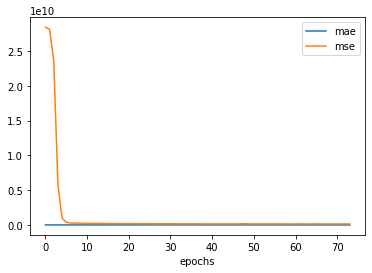

In [ ]:
#Train loss plot
train_mae_mse.plot()
plt.xlabel('epochs')

Text(0.5, 0, 'epochs')

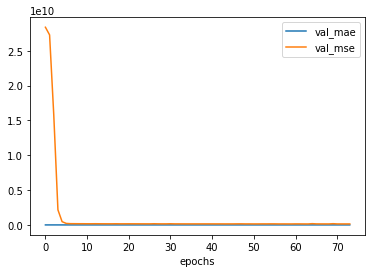

In [ ]:
#Test loss plot
val_mae_mse.plot()
plt.xlabel('epochs')

In [ ]:
print(model.evaluate(X_train,y_train))
print('\n')
print(model.evaluate(X_test,y_test))

19/19 [==============================] - 0s 3ms/step - loss: 100788592.0000 - mae: 7310.1821 - mse: 100788592.0000
[100788592.0, 7310.18212890625, 100788592.0]


9/9 [==============================] - 0s 3ms/step - loss: 142139648.0000 - mae: 9440.3711 - mse: 142139648.0000
[142139648.0, 9440.37109375, 142139648.0]


**Deep Neural Network Error**

In [ ]:
#Predictions of Deep Neural Network
train_dnn_pred=model.predict(X_train)
test_dnn_pred=model.predict(X_test)

9/9 [==============================] - 0s 2ms/step


In [ ]:
# Metrics of Deep Neural Network
train_mse_dnn=mean_squared_error(y_train,train_dnn_pred)
test_mse_dnn=mean_squared_error(y_test,test_dnn_pred)
train_rmse_dnn=math.sqrt(train_mse_dnn)
test_rmse_dnn=math.sqrt(test_mse_dnn)
train_mae_dnn=mean_absolute_error(y_train,train_dnn_pred)
test_mae_dnn=mean_absolute_error(y_test,test_dnn_pred)
train_rscore_dnn=r2_score(y_train,train_dnn_pred)
test_rscore_dnn=r2_score(y_test,test_dnn_pred)

**TransformedTargetRegressor**

In [ ]:
# prepare the model with input scaling
tt_pipe=Pipeline(
    steps=[('pca',PCA(n_components=10)),
           ('lr_model',LinearRegression())])
transformer = PowerTransformer()

In [ ]:
start_time=time.time()
tt_model=TransformedTargetRegressor(regressor=tt_pipe,transformer=transformer)
tt_model.fit(X_train,y_train)
end_time=time.time()
tt_time=end_time-start_time

In [ ]:
train_tt_pred=tt_model.predict(X_train)
test_tt_pred=tt_model.predict(X_test)

In [ ]:
train_mse_tt=mean_squared_error(y_train,train_tt_pred)
test_mse_tt=mean_squared_error(y_test,test_tt_pred)
train_rmse_tt=math.sqrt(train_mse_tt)
test_rmse_tt=math.sqrt(test_mse_tt)
train_mae_tt=mean_absolute_error(y_train,train_tt_pred)
test_mae_tt=mean_absolute_error(y_test,test_tt_pred)
train_rscore_tt=r2_score(y_train,train_tt_pred)
test_rscore_tt=r2_score(y_test,test_tt_pred)

In [ ]:
# Calculate the residuals
train_residuals = y_train -train_tt_pred
test_residuals = y_test -test_tt_pred

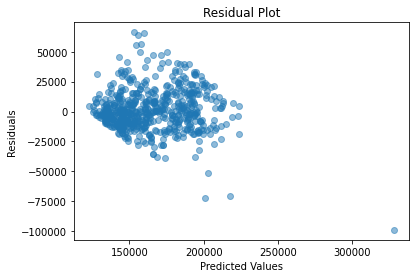

In [ ]:
# Create the residual plot
plt.scatter(train_tt_pred, train_residuals, alpha=0.5)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

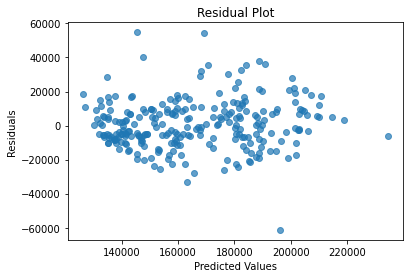

In [ ]:
# Create the residual plot
plt.scatter(test_tt_pred, test_residuals, alpha=0.7)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

The above testing and resdual plot shows us, there are some outliers which are hurt the performanve of the model.  The Outliers can have a significant impact on the performance of your model. So, the model may not be able to capture important patterns in the data.

In [ ]:
# Dataframe all models 
pd.DataFrame({'Models':['BaseLine Model','LinearRegression Model','Ridge Model','RandomForestRegressor','AdaBoostRegressor','GradientBoostingRegressor','Deep Neural Network'],
              'Train_mse_Error':[mse_bl_train,train_mse_lr,train_mse_rd,train_mse_rfr,train_mse_db,train_mse_grb,train_mse_dnn],
              'Test_mse_Error':[mse_bl_test,test_mse_lr,test_mse_rd,test_mse_rfr,test_mse_db,test_mse_grb,test_mse_dnn], 
              'Train_rmse_Error':[train_rmse_bl,train_rmse_lr,train_rmse_rd,train_rmse_rfr,train_rmse_db,train_rmse_grb,train_rmse_dnn],
              'Test_rmse_Error':[test_rmse_bl,test_rmse_lr,test_rmse_rd,test_rmse_rfr,test_rmse_db,test_rmse_grb,test_rmse_dnn],
              'Train_mae_Error':[mae_bl_train,train_mae_lr,train_mae_rd,train_mae_rfr,train_mae_db,train_mae_grb,train_mae_dnn],
              'Test_mae_Error':[mae_bl_test,test_mae_lr,test_mae_rd,test_mae_rfr,test_mae_db,test_mae_grb,test_mae_dnn], 
              'Train_rscore':[train_rscore_bl,train_rscore_lr,train_rscore_rd,train_rscore_rfr,train_rscore_db,train_rscore_grb,train_rscore_dnn],
              'Test_rscore':[test_rscore_bl,test_rscore_lr,test_rscore_rd,test_rscore_rfr,test_rscore_db,test_rscore_grb,test_rscore_dnn],
              'Time in Seconds':[bl_time,lr_training_time,ridge_training_time,787.65,adaboost_time,grb_time,3]}).set_index('Models')

,Train_mse_Error,Test_mse_Error,Train_rmse_Error,Test_rmse_Error,Train_mae_Error,Test_mae_Error,Train_rscore,Test_rscore,Time in Seconds
Models,,,,,,,,,
BaseLine Model,8.244401e+08,7.997387e+08,28713.065053,28279.651823,24529.000717,23979.593029,0.000000,0.000000,0.006865
LinearRegression Model,3.299755e+08,2.526336e+08,18165.228315,15894.452328,13821.869402,12187.865424,0.599758,0.684105,122.457295
Ridge Model,2.230870e+08,1.847917e+08,14936.096815,13593.811908,11161.163881,10066.800706,0.729408,0.768935,14.686008
RandomForestRegressor,1.440811e+08,2.005344e+08,12003.379799,14161.017900,9097.540139,10864.040819,0.825238,0.749250,787.650000
AdaBoostRegressor,2.343211e+08,2.941301e+08,15307.550012,17150.222457,13272.037365,14098.942733,0.715782,0.632217,19.989487
GradientBoostingRegressor,1.753847e+08,2.026812e+08,13243.288094,14236.613076,9971.636840,10895.640765,0.787268,0.746566,181.015442
Deep Neural Network,1.007886e+08,1.421397e+08,10039.351740,11922.234820,7310.182257,9440.371199,0.877749,0.822267,3.000000


 **Result Summary**:

In this final capstone project, six regression models were trained and evaluated. The first two models, Linear regression and Ridge model, are standard machine learning models for regression problems and both performed well compared to the base model. The Linear regression model had a higher train mean squared error of 3.299755e+08 and a test mean squared error of 2.526336e+08. The Ridge model had a lower train mean squared error of 2.230870e+08 and a test mean squared error of 1.847917e+08. Feature engineering was suggested to improve the performance of both models. The advanced models, including RandomForestRegressor, AdaBoostRegressor, GradientBoostRegressor, and a Deep Neural Network, outperformed the standard machine learning models and the base model in terms of error and processing time. The RandomForestRegressor had a test mean squared error of 2.005344e+08 and 75% r2_score, but it took longer to train at 787.65 seconds. The AdaBoostRegressor was faster to train at 19.989487 seconds, but it had a higher test mean squared error of 2.941301e+08 and lower r2_score of 63%. The GradientBoostRegressor had a lower test mean squared error of 2.026812e+08 and a higher r2_score of 76%, but it took longer to train at 181.015442 seconds.

The Linear regression and Ridge models perform well in terms of their training and testing errors. The note concludes that since both models have no significant difference in metrics between the training and testing errors, this indicates that both models are able to capture the important features and are performing well. However, the Ridge model outperforms the Linear regression model with 73% r_score on the training set and 77% on the testing set. The Linear regression model takes longer to train than the Ridge model. Additionally, both models require feature engineering to further improve their performance.

The note compares the performance of standard machine learning models, specifically the Linear regression and Ridge models, against advanced models, including 3 ensemble techniques and 1 Deep Neural Network model. The Ridge model performs well, but the Linear regression model has a big error and requires feature engineering to improve its performance. The note then describes the performance of the **RandomForestRegressor**, which has a train mean squared error of 1.440811e+08 and a test mean squared error of 2.005344e+08. The model has an r2_score of 83% on the training set and 75% on the test set, outperforming the standard machine learning models and base model. However, the model takes a significant amount of time to train at 787.65 seconds

The note describes the performance of the AdaBoostRegressor model, which has a train mean squared error of 2.343211e+08 and a test mean squared error of 2.941301e+08. The model trains much faster than the RandomForestRegressor model, taking only 19.989487 seconds to train. However, the model has an r2_score of 71% on the train set and 63% on the test set, indicating that it fits the training data well but is not performing well on the test data. This suggests that the model may be overfitting the training data.

The **GradientBoostRegressor **model performed well on both the train and test data, with errors of 1.753847e+08 and 2.026812e+08, respectively. However, this model takes longer to train than the AdaBoostRegressor model, taking 181.015442 seconds.

The note concludes that the **Deep Neural Network model** performed well in terms of both errors and processing time. The model has a train mean squared error of 1.007886e+08, a test mean squared error of 1.421397e+08, and a processing time of 3.000000 seconds. Additionally, the model has an 87% and 82% r2_score on the train and test set, which is higher than any other models evaluated.

**Note**: The note describes that all models are trained on 10 components, which is a result of the limitation of the computer process unit. Despite this limitation, all models are able to capture the importance well as indicated by the small difference between the train and test errors.

**Conclusion**: 

As stated above six models have been trained and tested for a specific regression problem, and their performance has been evaluated against a base model. While all models performed well, the deep neural network model outperformed the others in terms of both error and processing time.

The note describes the architecture of the Deep Neural Network model, which consists of 4 hidden layers with different numbers of neurons in each layer. The first hidden layer has 64 neurons, the second has 128 neurons, the third has 256 neurons, and the last hidden layer has 512 neurons with a dropout layer of 0.2. The note also mentions that this model outperformed the others in terms of both error and processing time, making it the best model for the regression problem.

**Finding**:

Based on the results obtained from the evaluation of different machine learning models, it can be concluded that the **Deep Neural Network** was the best model for this specific problem. It outperformed the other regression models that were trained and evaluated in this project.

**Recommendation**: 

The note emphasizes the importance of considering various factors that can affect the performance of a model, such as the size and quality of the dataset, the complexity of the model, and the hyperparameters used. Therefore, it is recommended to perform extensive testing and evaluation of the models before drawing any conclusions. Feature engineering techniques such as feature selection, feature extraction, and feature creation can be used to improve model performance. Additionally, the note suggests trying out other regression models such as **Support Vector Machine Regressor** (SVR), Extreme Gradient Boosting Regressor (**XGBRegressor**), and Light Gradient Boosting Machine Regressor  (**LGBMRegressor**)

